In [44]:
from tqdm.notebook import tqdm
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager    # 매 번 크롬 드라이버를 설치할 필요없이 자동으로
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert
from tqdm import tqdm_notebook
from urllib.request import urlopen
import time
import requests
import re
import os
import win32com.client as win32
#pip install pypiwin32


# 엑셀 변환 함수
def convert_xls_to_xlsx(xls_file_path, xlsx_file_path):
    excel = win32.Dispatch("Excel.Application")
    excel.DisplayAlerts = False
    wb = excel.Workbooks.Open(xls_file_path)
    wb.SaveAs(xlsx_file_path, FileFormat=51)  # FileFormat=51 corresponds to .xlsx
    wb.Close()
    excel.Quit()

    
input_folder = 'C:\\Users\\acorn\\Downloads'
output_folder = 'C:\\xlsx'

# 반복
for file_name in os.listdir(input_folder):
    if file_name.endswith('.xls'):
        input_file_path = os.path.join(input_folder, file_name)
        output_file_name = file_name.replace('.xls', '.xlsx')
        output_file_path = os.path.join(output_folder, output_file_name)

        print(f"Converting {input_file_path} to {output_file_path}")
        convert_xls_to_xlsx(input_file_path, output_file_path)
        print(f"Conversion complete for {output_file_path}")

Converting C:\Users\acorn\Downloads\2016년_전국_4대_브랜드별_멀티플렉스_현황_.xls to C:\xlsx\2016년_전국_4대_브랜드별_멀티플렉스_현황_.xlsx


com_error: (-2147352567, '예외가 발생했습니다.', (0, 'Microsoft Office Excel', '이 통합 문서를 이미 열려 있는 다른 통합 문서 또는 추가 기능과 같은 이름으로 저장할 수 없습니다. 다른 이름을 사용하거나 열려 있는 다른 파일을 닫은 후 저장하십시오.', 'C:\\Program Files (x86)\\Microsoft Office\\Office12\\1042\\XLMAIN11.CHM', 0, -2146827284), None)

In [ ]:
시리즈가 주는 관람객 수 증가량

In [42]:
data = pd.read_csv("C:\\GitTest\\10M_Movie\\movie_DB\\individual_movie\\movie_info_final.csv")

df = pd.DataFrame(data)
df.head()

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602


In [48]:
# 타이틀 인덱스 지정
#f.set_index('Title', inplace=True)
df.head()

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602


In [114]:
# 타이틀. 관객수
# 특정 타이틀 뽑기


for title in df["Title"]:
    strings = re.findall("어벤져스", title)
    if len(strings) > 0:
        print(title)

print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("스파이더맨", title)
    if len(strings) > 0:
        print(title)

        print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("스파이더맨", title)
    if len(strings) > 0:
        print(title)
 

어벤져스: 엔드게임
어벤져스: 인피니티 워
어벤져스: 에이지 오브 울트론
어벤져스
--------------------------------
스파이더맨: 파 프롬 홈
스파이더맨: 노 웨이 홈
스파이더맨: 홈 커밍
어메이징 스파이더맨
스파이더맨 3
어메이징 스파이더맨 2


In [116]:
# 어벤져스
result = pd.concat([
    df.loc[:, ["Title", "Audi"]][df['Title'] == "어벤져스"],
    df.loc[:, ["Title", "Audi"]][df['Title'] == "어벤져스: 인피니티 워"],
    df.loc[:, ["Title", "Audi"]][df['Title'] == "어벤져스: 엔드게임"],
    df.loc[:, ["Title", "Audi"]][df['Title'] == "어벤져스: 에이지 오브 울트론"]
])
result.sort_index()

,Title,Audi
4,어벤져스: 엔드게임,13977602
20,어벤져스: 인피니티 워,11233176
25,어벤져스: 에이지 오브 울트론,10504487
60,어벤져스,7087971


In [120]:
df1=df[df["title"]=="어벤져스+[:가+힇]"]

KeyError: 'title'

In [108]:
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]=False
# .pyplot 모듈

TypeError: unhashable type: 'numpy.ndarray'

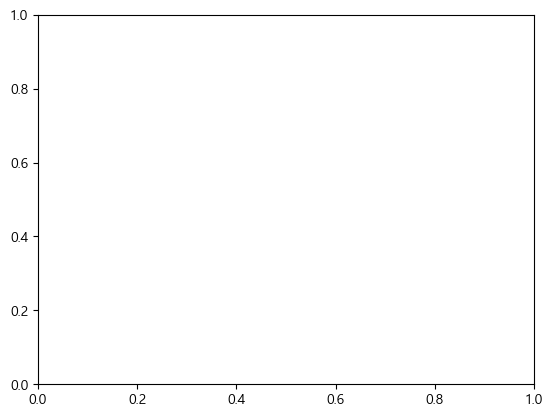

In [113]:
one = df.loc[:, ["Title", "Audi"]][df['Title'] == "어벤져스"],
two = df.loc[:, ["Title", "Audi"]][df['Title'] == "어벤져스: 인피니티 워"],

x = [one]
y = [two]

plt.plot(x, y)
